# Problem definition
Tina Belcher, brand new manager of the new Bob´s burger parlour downtown San Francisco,  wants to analyse the impact on the market and the loyalty of the customers of Bob’s Burger and Pesto´s, an Italian restaurant nearby. It is assumed that one customer dines once a week at Bob’s or at Pesto´s, but not at both.
Tina has collected information from 100 consumers over a 10-week period. When checking the data, she discovered that of all the customers who consumed at Bob’s in a given week, 90 % returned to the restaurant following week, while 10 % switched to Pesto’s. Of all the consumers who consumed at Pesto’s in a given week, 80 % returned to the same place the following week, but 20 % switched to Bob´s.
Assuming that the transition probabilities are the same for every customer and that they not change over time, we can get insights modelling customer fidelity with Markov chains.


## Model
We model the decision of customers as a Markov chain, assuming two possible states every week (which is the discrete event period of our model). The states are: 

- $s_1$: represents the customers decision to go to Bob´s Burger.
- $s_2$: represents the customers decision to go to Pestos. 

Now, with the data collected by Tina, we can estimate the transition probability Matrix. 

- $p_{11}$: It is the probability that a customer goes back to Bob´s Burger after they have been to Bob´s Burger. Tina discovered that this probability is 0.9 or 90%.
- $p_{12}$: It is the probability that a customer goes to Pesto´s after going to Bob´s Burger. Tina estimates that this probability is 10%. Clearly, it has to be ($1-p_{11}=0.1$) since we only consider two possible states and at any given time, the system has to be in one particular state, so the transition probabilities need to add up to 1.
- $p_{11}$: It is the probability that a customer goes back to Bob´s Burger after they have been to Bob´s Burger. Tina discovered that this probability is 0.9 or 90%.
- $p_{21}$: It is the probability that a customer goes to Bob´s Burger after going to Pesto´s. Tina estimates this probability to be 0.2.
- $p_{22}$: It is the probability that a customer goes to Pesto´s for two consecutive week, 0.8 according to Tina´s data. 

With this, the transition probability matrix is:


$
P^{(1)} = 
\begin{bmatrix}
0.9 & 0.1\\
0.2 & 0.8
\end{bmatrix}	
$


We can use Graphviz to represent the Markov chain:


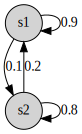

In [2]:
from graphviz import Digraph
# Create Digraph object
din = Digraph(format='png')

# Add Bob´s Burger node
din.node('s1', shape='circle', style="filled")

# Add Pesto´s node
din.node('s2', shape='circle', style="filled")

# Add edges
din.edge('s1', 's1', '0.9')
din.edge('s1', 's2', '0.1')

din.edge('s2', 's1', '0.2')
din.edge('s2', 's2', '0.8')

din

Now, let us answer some questions:

**a)** If at week 0, a customer dines at Bob’s, what is the probability of the same customer dining at Bob´s in week 1?

Tina estimated that this is 90%, it is also possible to calculate it using the initial status and the probability Matrix, just in case we want to get more insights about this scenario. Since we are analysing a customer that goes to Bob´s at time 0, the probability vector is:

$V_0 = [p_1, p_2] = [1, 0]$

The, at t=1, the probability vector becomes: 

$V_1 = V_0·P^{(1)} = [1, 0]·\begin{bmatrix}
0.9 & 0.1\\
0.2 & 0.8
\end{bmatrix} = [0.9, 0]$

**b)** What is the probability of a customer going back to Bob´s two weeks running?


Now, in a Markov system, the possibility of a sequence of states, not taking into consideration any initial state and considering that the probability only depends on the previous state, is the product of the corresponding transition probabilities. In this example, we are analysing a sequence $s_1, s_1, s_1$, where the customer goes back to Bob's two consecutive week. If we do not consider any initial state, the probability is:

$p_{11}·p_{11} = 0.9·0.9 = 0.81$


**c)** What is the probability of a customer changing to Pesto´s after dining at Bob´s and then going back to Bob´s


Again, if we do not consider any initial state, we are analysing a sequence $s_1, s_2, s_1$, and the probability of this sequence is: 

$p_{12}·p_{21} = 0.1·0.2 = 0.02$


**d)** Consider the customer of section a) what is the probability that this customer comes back to Bob´s in two weeks time?


Now, coming back to the first example, we have an initial state, and now we want want to consider the two step transition probability matrix:

$V_2 = V_0·P^{(2)} = [1, 0]·\begin{bmatrix}
0.83 & 0.17\\
0.34 & 0.66
\end{bmatrix} = [0.83, 0.17]$


**e)** What is the expected market share of customers between the two restaurants?

We can calculate the stationary probabilities representing the probability that a customer is in a restaurant when k tends to infinity. In this case, we need to solve the following linear system of equations:

$\pi_1 = 0.9·\pi_1 + 0.2·\pi_2$

$\pi_2 = 0.1·\pi_1 + 0.8·\pi_2$

$\pi_1 + \pi_2 = 1$

This yields:

$0.1·\pi_1 = 0.2·\pi_2$

$\pi_2 = 1/3$

$\pi_1 = 2/3$

That is, in the long run, it is expected that 66.67% of customers are at state 1 (Bob´s Burger) and 33.33% of customers at state 2 (Pesto´s).